# Регуляризация линейной регрессии. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии с регуляризацией на реальных данных.

## Что входит в практическую работу

1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ, сконструировать новые признаки.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью библиотеки Scikit-learn.
5. Подобрать коэффициенты регуляризации.
6. Получить качество модели с помощью MSE, MAE, $R^2$.
7. Ответить на вопросы в конце блокнота.

## Что оценивается 

- Выполнены все этапы работы.
- Подобраны коэффициенты регуляризации.
- Сделан вывод по результатам.
- Модель не переобучена.
- Получена модель хорошего качества.
- Сделаны выводы в конце блокнота.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задания.

## Задача

С набором данных вы уже знакомы из прошлого модуля — это данные по продажам домов. В этот раз признаков будет чуть больше, чтобы вам было интереснее. Краткое описание признаков:

* **LotArea** — размер участка в квадратных футах.
* **LotArea_M** — размер участка в квадратных метрах.
* **Street** — тип доступа к дороге.
* **BldgType** — тип жилья.
* **OverallQual** — общее качество материала и отделки.
* **OverallCond** — общая оценка состояния.
* **YearBuilt** — первоначальная дата постройки.
* **YearRemodAdd** — дата реконструкции.
* **RoofStyle** — тип крыши.
* **ExterQual** — качество материалов снаружи.
* **ExterCond** — текущее состояние материалов снаружи.
* **Foundation** — тип фундамента.
* **TotalBsmtSF** — общая площадь подвала в квадратных футах.
* **TotalBsmtSF_M** — общая площадь подвала в квадратных метрах.
* **Heating** — тип отопления.
* **HeatingQC** — качество и состояние отопления.
* **CentralAir** — кондиционирование.
* **GrLivArea** — жилая площадь в квадратных футах.
* **GrLivArea_M** — жилая площадь в квадратных метрах.
* **Bath** — количество ванных комнат.
* **KitchenQual** — качество кухни.
* **GarageArea** — площадь гаража в квадратных футах.
* **GarageArea_M** — площадь гаража в квадратных метрах.
* **DateSold** — месяц и год продажи.
* **SaleCondition** — условия сделки.
* **SalePrice** — стоимость продажи в долларах. Это целевая переменная, которую нам нужно предсказать.

Постройте модель линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE, $R^2$. Определите, что модель не переобучилась.

## Задание 1 

Подключите необходимые библиотеки.

In [81]:
### Ваш код здесь ###
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge

## Задание 2

Считайте данные и посмотрите на несколько строк.

In [82]:
### Ваш код здесь ###
df = pd.read_csv('data.csv')
df.head()

,LotArea,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,...,CentralAir,GrLivArea,GrLivArea_M,Bath,KitchenQual,GarageArea,GarageArea_M,DateSold,SaleCondition,SalePrice
0,8450,785.03035,Pave,1Fam,7,5,2003,2003,Gable,Gd,...,Y,1710,158.864130,3,Gd,548,50.910844,2/2008,Normal,208500
1,9600,891.86880,Pave,1Fam,6,8,1976,1976,Gable,TA,...,Y,1262,117.243586,2,TA,460,42.735380,5/2007,Normal,181500
2,11250,1045.15875,Pave,1Fam,7,5,2001,2002,Gable,Gd,...,Y,1786,165.924758,3,Gd,608,56.485024,9/2008,Normal,223500
3,9550,887.22365,Pave,1Fam,7,5,1915,1970,Gable,TA,...,Y,1717,159.514451,1,Gd,642,59.643726,2/2006,Abnorml,140000
4,14260,1324.79678,Pave,1Fam,8,5,2000,2000,Gable,Gd,...,Y,2198,204.200794,3,Gd,836,77.666908,12/2008,Normal,250000


## Задание 3 

Проведите разведочный анализ:

1. Выведите описательные статистики для числовых признаков.

In [83]:
### Ваш код здесь ###
df.describe(include = ['float64', 'int64'])

,LotArea,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotalBsmtSF_M,GrLivArea,GrLivArea_M,Bath,GarageArea,GarageArea_M,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,977.044879,6.099315,5.575342,1971.267808,1984.865753,1057.429452,98.238368,1515.463699,140.791124,1.947945,472.980137,43.941274,180921.195890
std,9981.264932,927.289456,1.382997,1.112799,30.202904,20.645407,438.705324,40.757041,525.480383,48.818704,0.794965,213.804841,19.863111,79442.502883
min,1300.000000,120.773900,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,31.029602,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,701.742811,5.000000,5.000000,1954.000000,1967.000000,795.750000,73.927562,1129.500000,104.933938,1.000000,334.500000,31.076054,129975.000000
50%,9478.500000,880.581085,6.000000,5.000000,1973.000000,1994.000000,991.500000,92.113325,1464.000000,136.009992,2.000000,480.000000,44.593440,163000.000000
75%,11601.500000,1077.814155,7.000000,6.000000,2000.000000,2004.000000,1298.250000,120.611320,1776.750000,165.065405,3.000000,576.000000,53.512128,214000.000000
max,215245.000000,19996.906235,10.000000,9.000000,2010.000000,2010.000000,6110.000000,567.637330,5642.000000,524.158726,4.000000,1418.000000,131.736454,755000.000000


2. Постройте матрицу корреляций числовых признаков. Удалите линейно-зависимые признаки из данных.

<Axes: >

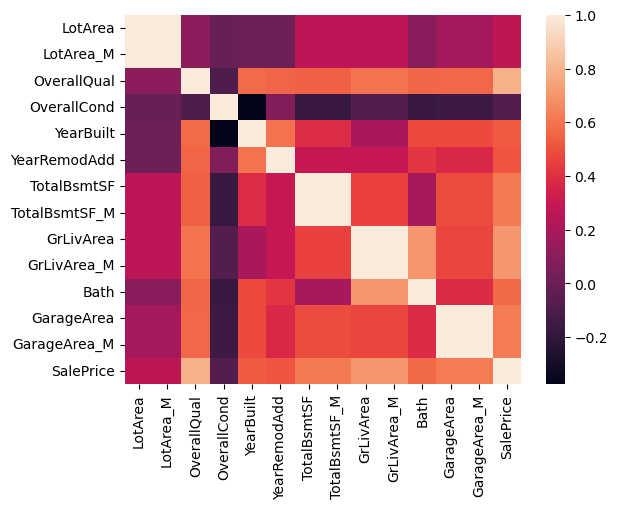

In [84]:
### Ваш код здесь ###
corr = df.corr(numeric_only = True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
#matrix = df['SalePrice'].corr(df[['LotArea_M', 'LotArea_M', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                 # 'TotalBsmtSF', 'TotalBsmtSF_M', 'GrLivArea', 'GrLivArea_M', 'Bath', 'GarageArea', 
                                # 'GarageArea_M']])
#matrix

In [85]:
matrix = df.corr(numeric_only = True)
matrix

,LotArea,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotalBsmtSF_M,GrLivArea,GrLivArea_M,Bath,GarageArea,GarageArea_M,SalePrice
LotArea,1.000000,1.000000,0.105806,-0.005636,0.014228,0.013788,0.260833,0.260833,0.263116,0.263116,0.096360,0.180403,0.180403,0.263843
LotArea_M,1.000000,1.000000,0.105806,-0.005636,0.014228,0.013788,0.260833,0.260833,0.263116,0.263116,0.096360,0.180403,0.180403,0.263843
OverallQual,0.105806,0.105806,1.000000,-0.091932,0.572323,0.550684,0.537808,0.537808,0.593007,0.593007,0.554555,0.562022,0.562022,0.790982
OverallCond,-0.005636,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.171098,-0.171098,-0.079686,-0.079686,-0.172989,-0.151521,-0.151521,-0.077856
YearBuilt,0.014228,0.014228,0.572323,-0.375983,1.000000,0.592855,0.391452,0.391452,0.199010,0.199010,0.478016,0.478954,0.478954,0.522897
YearRemodAdd,0.013788,0.013788,0.550684,0.073741,0.592855,1.000000,0.291066,0.291066,0.287389,0.287389,0.420235,0.371600,0.371600,0.507101
TotalBsmtSF,0.260833,0.260833,0.537808,-0.171098,0.391452,0.291066,1.000000,1.000000,0.454868,0.454868,0.193469,0.486665,0.486665,0.613581
TotalBsmtSF_M,0.260833,0.260833,0.537808,-0.171098,0.391452,0.291066,1.000000,1.000000,0.454868,0.454868,0.193469,0.486665,0.486665,0.613581
GrLivArea,0.263116,0.263116,0.593007,-0.079686,0.199010,0.287389,0.454868,0.454868,1.000000,1.000000,0.699614,0.468997,0.468997,0.708624
GrLivArea_M,0.263116,0.263116,0.593007,-0.079686,0.199010,0.287389,0.454868,0.454868,1.000000,1.000000,0.699614,0.468997,0.468997,0.708624


In [86]:
#Удаляю колонки, которые имеют линейную корреляцию с другими признаками датафрейма
df1 = df.drop(['LotArea_M', 'TotalBsmtSF_M', 'GrLivArea_M', 'GarageArea_M'], axis = 1)
df1.head()

,LotArea,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,ExterCond,...,Heating,HeatingQC,CentralAir,GrLivArea,Bath,KitchenQual,GarageArea,DateSold,SaleCondition,SalePrice
0,8450,Pave,1Fam,7,5,2003,2003,Gable,Gd,TA,...,GasA,Ex,Y,1710,3,Gd,548,2/2008,Normal,208500
1,9600,Pave,1Fam,6,8,1976,1976,Gable,TA,TA,...,GasA,Ex,Y,1262,2,TA,460,5/2007,Normal,181500
2,11250,Pave,1Fam,7,5,2001,2002,Gable,Gd,TA,...,GasA,Ex,Y,1786,3,Gd,608,9/2008,Normal,223500
3,9550,Pave,1Fam,7,5,1915,1970,Gable,TA,TA,...,GasA,Gd,Y,1717,1,Gd,642,2/2006,Abnorml,140000
4,14260,Pave,1Fam,8,5,2000,2000,Gable,Gd,TA,...,GasA,Ex,Y,2198,3,Gd,836,12/2008,Normal,250000


3. Посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной.

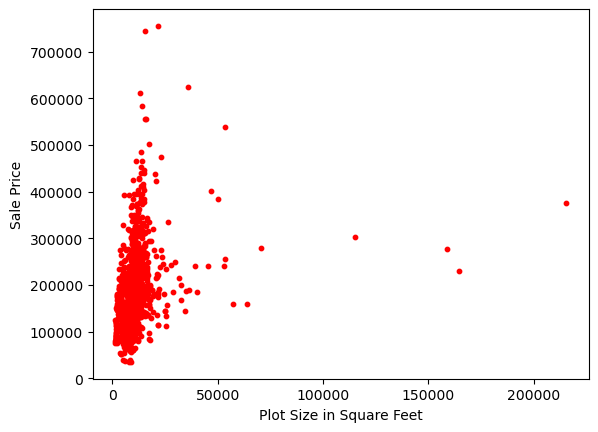

In [87]:
### Ваш код здесь ###
plt.scatter(df1['LotArea'], df1['SalePrice'], s = 10, c = 'r')
plt.xlabel('Plot Size in Square Feet')
plt.ylabel('Sale Price')
plt.show()

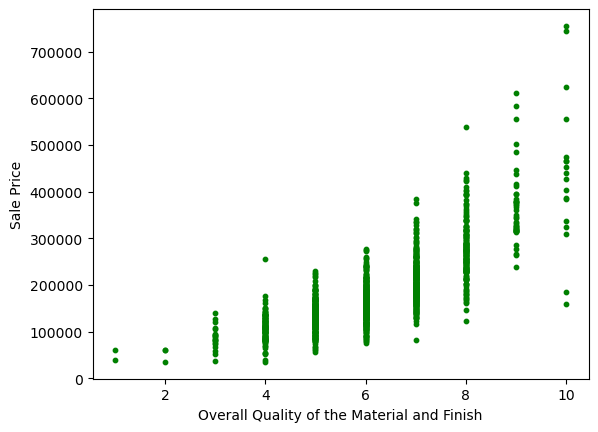

In [88]:
plt.scatter(df['OverallQual'], df['SalePrice'], s = 10, c = 'g')
plt.xlabel('Overall Quality of the Material and Finish')
plt.ylabel('Sale Price')
plt.show()

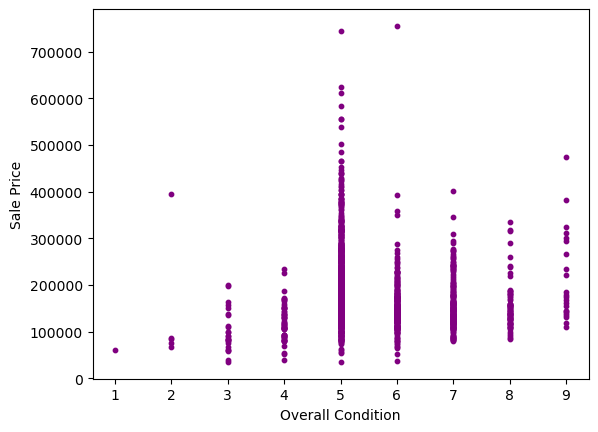

In [89]:
plt.scatter(df['OverallCond'], df['SalePrice'], s = 10, c = 'purple')
plt.xlabel('Overall Condition')
plt.ylabel('Sale Price')
plt.show()

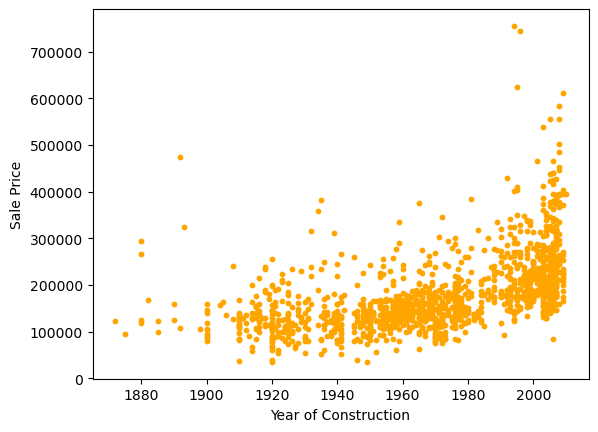

In [90]:
plt.scatter(df['YearBuilt'], df['SalePrice'], s = 10, c = 'orange')
plt.xlabel('Year of Construction')
plt.ylabel('Sale Price')
plt.show()

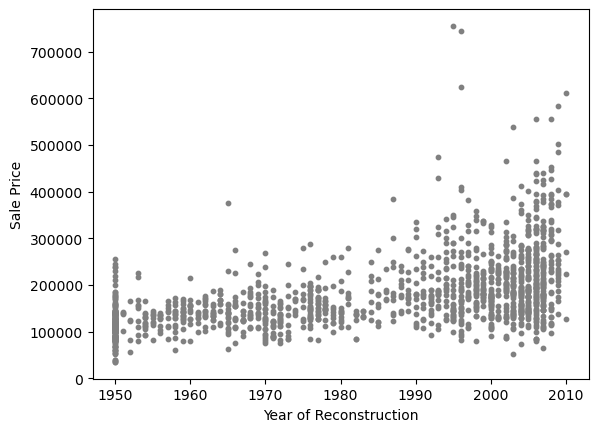

In [91]:
plt.scatter(df['YearRemodAdd'], df['SalePrice'], s = 10, c = 'grey')
plt.xlabel('Year of Reconstruction')
plt.ylabel('Sale Price')
plt.show()

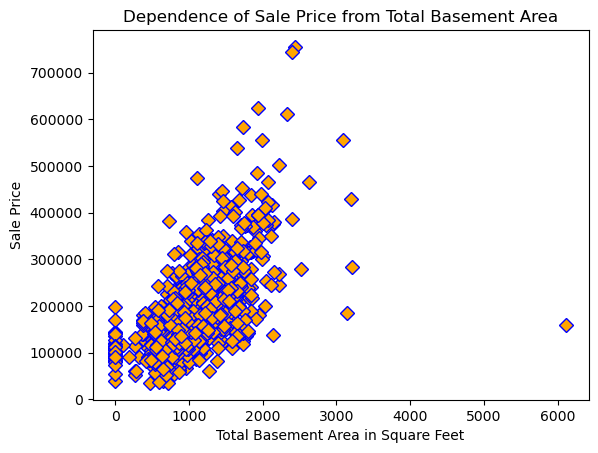

In [92]:
fig, ax = plt.subplots()

ax.plot(df1['TotalBsmtSF'], df1['SalePrice'], color='blue', marker='D', linestyle='None', linewidth=0,
        markersize=7, markerfacecolor = 'orange')
ax.set_title('Dependence of Sale Price from Total Basement Area')
ax.set_xlabel('Total Basement Area in Square Feet')
ax.set_ylabel('Sale Price')
plt.show()

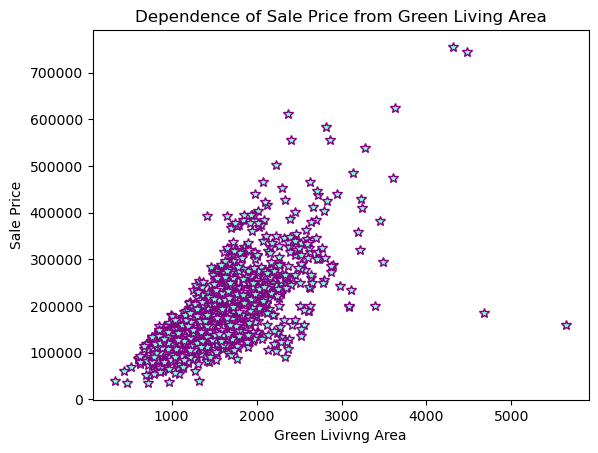

In [93]:
fig, ax = plt.subplots()

ax.plot(df1['GrLivArea'], df1['SalePrice'], color='purple', marker='*', linestyle='None', linewidth=0,
        markersize=7, markerfacecolor = 'aquamarine')
ax.set_title('Dependence of Sale Price from Green Living Area')
ax.set_xlabel('Green Livivng Area')
ax.set_ylabel('Sale Price')
plt.show()

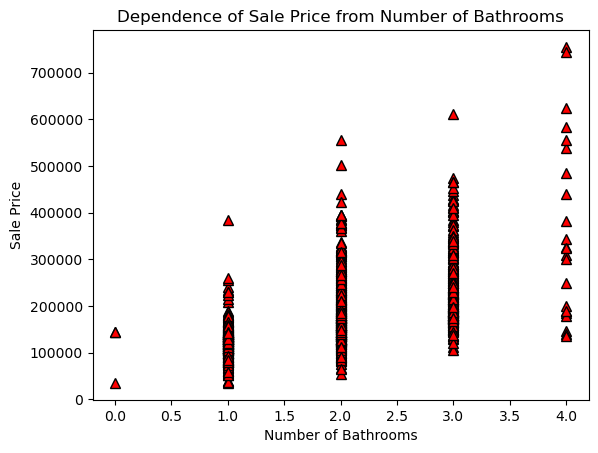

In [94]:
fig, ax = plt.subplots()

ax.plot(df1['Bath'], df1['SalePrice'], color='black', marker='^', linestyle='None', linewidth=0,
        markersize=7, markerfacecolor = 'red')
ax.set_title('Dependence of Sale Price from Number of Bathrooms')
ax.set_xlabel('Number of Bathrooms')
ax.set_ylabel('Sale Price')
plt.show()

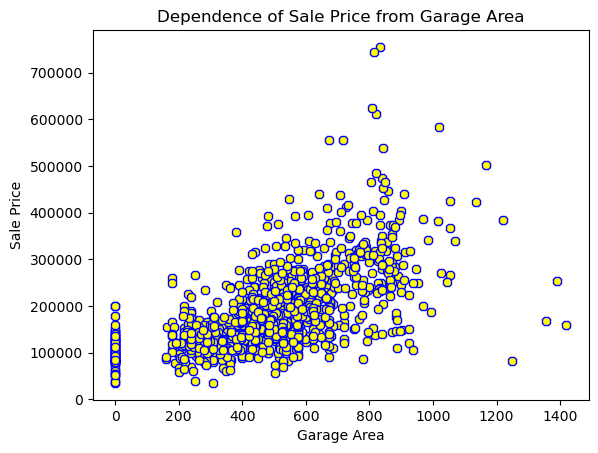

In [95]:
fig, ax = plt.subplots()

ax.plot(df1['GarageArea'], df1['SalePrice'], color='blue', marker='8', linestyle='None', linewidth=0,
        markersize=7, markerfacecolor = 'yellow')
ax.set_title('Dependence of Sale Price from Garage Area')
ax.set_xlabel('Garage Area')
ax.set_ylabel('Sale Price')
plt.show()

4. Сделайте предварительные выводы.

## Из построенных графиков можно сделать следующие выводы:
#### 1) Зависимость стоимости жилого объекта от размера участка в квадратных футах носит практически линейный характер. Однако на данном графике виды некоторые выбросы.
#### 2) Зависимость стоимости жилого объекта от качества материалов и отделки носит явный квадратичный характер, поэтому данный признак следует видоизменить и представить не только в качестве линейного, но и в качестве квадратичного.
#### 3)  Зависимость стоимости жилого объекта от его общего состояния носит характер близкий к линейному, поэтому данный признак следует видоизменить и представить не только в качестве линейного, но и в качестве квадратичного.
#### 4) Зависимость стоимости жилого объекта от года постройки носит характер близкий к линейному. На графике имеются выбросы.
#### 5) Зависимость стоимости жилого объекта от года реконструкции носит характер близкий к линейному. 
#### 6) Зависимость стоимости жилого объекта от общей площади подвала носит характер близкий к линейному. На данном графике имеются выбросы.
#### 7) Зависимость стоимости дома от площади зеленой зоны носит характер близкий к линейному. На данном графике также имеются выбросы.
#### 8) Зависимость стоимости дома от количества ванных комнат носит характер близкий к линейному.
#### 9) Зависимость стоимость жилого объекта от площади гаража носит характер близкий к квадратному. На графике имеются выбросы.

5. Создайте дополнительные переменные из уже имеющихся, обоснуйте свои решения.

In [96]:
### Ваш код здесь ###
df['OverallQual^2'] = df['OverallQual'].apply(lambda x: x**2)
df.head()

,LotArea,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,...,GrLivArea,GrLivArea_M,Bath,KitchenQual,GarageArea,GarageArea_M,DateSold,SaleCondition,SalePrice,OverallQual^2
0,8450,785.03035,Pave,1Fam,7,5,2003,2003,Gable,Gd,...,1710,158.864130,3,Gd,548,50.910844,2/2008,Normal,208500,49
1,9600,891.86880,Pave,1Fam,6,8,1976,1976,Gable,TA,...,1262,117.243586,2,TA,460,42.735380,5/2007,Normal,181500,36
2,11250,1045.15875,Pave,1Fam,7,5,2001,2002,Gable,Gd,...,1786,165.924758,3,Gd,608,56.485024,9/2008,Normal,223500,49
3,9550,887.22365,Pave,1Fam,7,5,1915,1970,Gable,TA,...,1717,159.514451,1,Gd,642,59.643726,2/2006,Abnorml,140000,49
4,14260,1324.79678,Pave,1Fam,8,5,2000,2000,Gable,Gd,...,2198,204.200794,3,Gd,836,77.666908,12/2008,Normal,250000,64


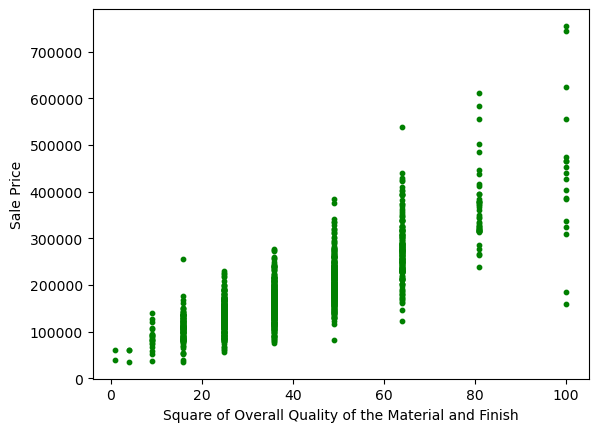

In [97]:
plt.scatter(df['OverallQual^2'], df['SalePrice'], s = 10, c = 'g')
plt.xlabel('Square of Overall Quality of the Material and Finish')
plt.ylabel('Sale Price')
plt.show()

In [98]:
df['GarageArea^2'] = df['GarageArea'].apply(lambda x: x**2)
df.head()

,LotArea,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,...,GrLivArea_M,Bath,KitchenQual,GarageArea,GarageArea_M,DateSold,SaleCondition,SalePrice,OverallQual^2,GarageArea^2
0,8450,785.03035,Pave,1Fam,7,5,2003,2003,Gable,Gd,...,158.864130,3,Gd,548,50.910844,2/2008,Normal,208500,49,300304
1,9600,891.86880,Pave,1Fam,6,8,1976,1976,Gable,TA,...,117.243586,2,TA,460,42.735380,5/2007,Normal,181500,36,211600
2,11250,1045.15875,Pave,1Fam,7,5,2001,2002,Gable,Gd,...,165.924758,3,Gd,608,56.485024,9/2008,Normal,223500,49,369664
3,9550,887.22365,Pave,1Fam,7,5,1915,1970,Gable,TA,...,159.514451,1,Gd,642,59.643726,2/2006,Abnorml,140000,49,412164
4,14260,1324.79678,Pave,1Fam,8,5,2000,2000,Gable,Gd,...,204.200794,3,Gd,836,77.666908,12/2008,Normal,250000,64,698896


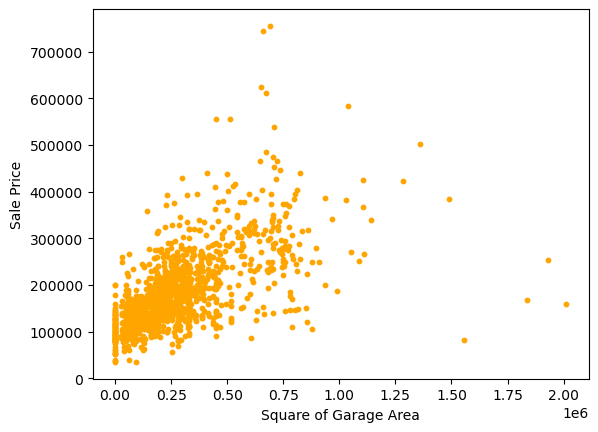

In [99]:
plt.scatter(df['GarageArea^2'], df['SalePrice'], s = 10, c = 'orange')
plt.xlabel('Square of Garage Area')
plt.ylabel('Sale Price')
plt.show()

## Задание 4 

Подготовьте данные:

1. Разделите данные на тренировочную и тестовую выборки.

In [100]:
### Ваш код здесь ###
x = df1.drop(['SalePrice'], axis = 1)
y = df1['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

2. Закодируйте категориальные признаки в тренировочной и тестовой выборках.

In [101]:
### Ваш код здесь ###
ohe = OneHotEncoder(sparse_output = False)
ohe

OneHotEncoder(sparse_output=False)

In [102]:
df1.columns

Index(['LotArea', 'Street', 'BldgType', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'ExterQual', 'ExterCond',
       'Foundation', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'GrLivArea', 'Bath', 'KitchenQual', 'GarageArea', 'DateSold',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [103]:
ohe.fit(df1[['Street', 'BldgType', 'RoofStyle', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir',
            'KitchenQual', 'SaleCondition']])

OneHotEncoder(sparse_output=False)

In [104]:
ohe_train = ohe.transform(df1[['Street', 'BldgType', 'RoofStyle', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir',
            'KitchenQual', 'SaleCondition']])

In [105]:
df1[ohe.get_feature_names_out()] = ohe_train
columns_for_drop = ['Street', 'BldgType', 'RoofStyle', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir',
            'KitchenQual', 'SaleCondition', 'DateSold']
df1.drop(columns = columns_for_drop, axis = 1 , inplace= True)
df1.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,Bath,GarageArea,SalePrice,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,7,5,2003,2003,856,1710,3,548,208500,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,9600,6,8,1976,1976,1262,1262,2,460,181500,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,11250,7,5,2001,2002,920,1786,3,608,223500,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,9550,7,5,1915,1970,756,1717,1,642,140000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,14260,8,5,2000,2000,1145,2198,3,836,250000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [106]:
#ohe.fit(x_test[['Street', 'BldgType', 'RoofStyle', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir',
          #  'KitchenQual', 'SaleCondition']])

In [107]:
#ohe_test = ohe.transform(x_test[['Street', 'BldgType', 'RoofStyle', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir',
           # 'KitchenQual', 'SaleCondition']])

In [108]:
#x_test[ohe.get_feature_names_out()] = ohe_test
#columns_for_drop = ['Street', 'BldgType', 'RoofStyle', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir',
        #    'KitchenQual', 'SaleCondition', 'DateSold']
#x_test.drop(columns = columns_for_drop, axis = 1 , inplace= True)
#x_test.head()

3. Подготовьте числовые признаки в тренировочной и тестовой выборках к передаче в модель: приведите их к единому масштабу.

In [109]:
from sklearn import preprocessing

In [110]:
### Ваш код здесь ###
norm_df1 = preprocessing.normalize(df1, axis=0)
scaled_df1 = pd.DataFrame(norm_df1, columns = df1.columns)
scaled_df1.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,Bath,GarageArea,SalePrice,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.015255,0.029293,0.023017,0.026589,0.026409,0.019570,0.027902,0.03732,0.027632,0.027617,...,0.0,0.0,0.04131,0.000000,0.000000,0.0,0.0,0.0,0.028892,0.0
1,0.017331,0.025108,0.036827,0.026231,0.026053,0.028851,0.020592,0.02488,0.023195,0.024041,...,0.0,0.0,0.00000,0.036886,0.000000,0.0,0.0,0.0,0.028892,0.0
2,0.020310,0.029293,0.023017,0.026563,0.026396,0.021033,0.029142,0.03732,0.030657,0.029604,...,0.0,0.0,0.04131,0.000000,0.000000,0.0,0.0,0.0,0.028892,0.0
3,0.017241,0.029293,0.023017,0.025421,0.025974,0.017283,0.028016,0.01244,0.032372,0.018544,...,0.0,0.0,0.04131,0.000000,0.099504,0.0,0.0,0.0,0.000000,0.0
4,0.025743,0.033477,0.023017,0.026550,0.026369,0.026177,0.035865,0.03732,0.042154,0.033114,...,0.0,0.0,0.04131,0.000000,0.000000,0.0,0.0,0.0,0.028892,0.0


In [111]:
#norm_x_test = preprocessing.normalize(x_test, axis=0)
#scaled_x_test = pd.DataFrame(norm_x_test, columns = x_train.columns)
#scaled_x_test.head()

In [112]:
x = df1.drop(['SalePrice'], axis = 1)
y = df1['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Задание 5

Займитесь обучением модели:

1. Обучите модель линейной регрессии без регуляризации. Посмотрите на веса полученной модели. Сделайте предсказания по обучающей и тестовой выборкам.

In [113]:
### Ваш код здесь ###
train_X = x_train
train_Y = y_train
test_X = x_test
test_Y = y_test

In [114]:
linear_regression = LinearRegression()

In [115]:
linear_regression.fit(train_X, train_Y)

LinearRegression()

In [116]:
predicted_train = linear_regression.predict(train_X)
predicted_train

array([204186.88631846, 120934.53779599, 210750.82465295, ...,
       133291.3758867 , 168660.388948  , 214211.36297168])

In [117]:
predicted_test = linear_regression.predict(test_X)
predicted_test

array([156367.94510127, 286984.98523273, 109203.12127493, 167784.77060731,
       319062.62408621,  62693.05818073, 222375.9677708 , 135875.83358186,
        42852.38482001, 143579.21849886, 152299.95204841, 116230.47563819,
       115603.65658393, 220733.9494867 , 183509.21281618, 125939.47623504,
       218550.206906  , 123484.95691212, 111882.62000005, 218479.60164431,
       161053.49702768, 237893.02439745, 196160.86508097, 123095.84779415,
       217531.52976971, 167362.08982894, 213205.60242957, 101732.13292963,
       185871.09158161, 198555.24503144, 126640.39173823, 250590.75842596,
       255494.23692546, 107157.6176341 , 256026.42302111, 147368.7246488 ,
       145454.62834444, 226822.70392818, 287347.71014211,  99678.14148594,
       139459.16873935, 233888.23164822, 116635.44341155, 372134.42206944,
       132304.28761956, 152479.79540454, 105760.99710356, 129679.7469419 ,
       376190.09453453, 142692.80139107, 116687.95382534, 192235.97419471,
       117596.74879451, 2

In [118]:
print(linear_regression.score(train_X, train_Y))
print(linear_regression.score(test_X, test_Y))

0.7997349421754213
0.8384392154465481


In [119]:
train_mse = mean_squared_error(train_Y, predicted_train)
test_mse = mean_squared_error(test_Y, predicted_test)
print('Train MSE: {}'.format(train_mse))
print('Test MSE: {}'.format(test_mse))

Train MSE: 1205310364.1028821
Test MSE: 1127386302.704902


In [120]:
train_mae = mean_absolute_error(train_Y, predicted_train)
test_mae = mean_absolute_error(test_Y, predicted_test)
print('Train MAE: {}'.format(train_mae))
print('Test MAE: {}'.format(test_mae))

Train MAE: 19941.749917905006
Test MAE: 21303.702564927036


In [121]:
train_r2 = r2_score(train_Y, predicted_train)
test_r2 = r2_score(test_Y, predicted_test)
print('Train R2: {}'.format(train_r2))
print('Test R2: {}'.format(test_r2))

Train R2: 0.7997349421754213
Test R2: 0.8384392154465481


2. Понаблюдайте, как ведёт себя модель с L1-регуляризацией (Lasso). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Lasso.

In [122]:
### Ваш код здесь ###
lasso_regression = Lasso(alpha = 0.1)

In [123]:
lasso_regression.fit(train_X, train_Y)

C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.004e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [124]:
print(lasso_regression.score(train_X, train_Y))
print(lasso_regression.score(test_X, test_Y))

0.799734927652726
0.8384516412251399


In [125]:
lasso_train = lasso_regression.predict(train_X)
lasso_train

array([204187.24180888, 120933.52615008, 210750.26814688, ...,
       133291.36270318, 168657.48410184, 214212.14296782])

In [126]:
lasso_test = lasso_regression.predict(test_X)
lasso_test

array([156366.20317228, 286984.62418596, 109202.18039929, 167783.38299174,
       319064.41354186,  62691.09650764, 222373.79089835, 135870.23752741,
        42855.78339958, 143580.56391029, 152296.84844354, 116229.6818131 ,
       115563.90567648, 220734.18376588, 183509.68388864, 125938.03214603,
       218550.2984961 , 123486.4283182 , 111882.70565936, 218479.87260882,
       161054.87906952, 237892.30359213, 196161.70910305, 123093.22920103,
       217531.59599417, 167361.90975789, 213204.79079422, 101733.86675131,
       185870.94336553, 198552.97018174, 126637.42413658, 250590.89028694,
       255495.87155187, 107156.12510149, 256026.06543197, 147367.0723586 ,
       145455.75347839, 226822.79336783, 287348.2106756 ,  99679.18467797,
       139457.72495406, 233888.38470526, 116635.74835073, 372132.13859164,
       132306.72951937, 152471.17027441, 105762.01557525, 129677.34510929,
       376185.33821925, 142684.68100956, 116685.83549347, 192236.57956783,
       117594.7833171 , 2

In [127]:
lasso_train_mse = mean_squared_error(train_Y, lasso_train)
lasso_test_mse = mean_squared_error(test_Y, lasso_test)
print('Train MSE: {}'.format(lasso_train_mse))
print('Test MSE: {}'.format(lasso_test_mse))

Train MSE: 1205310451.5088193
Test MSE: 1127299594.4568355


In [128]:
lasso_train_mae = mean_absolute_error(train_Y, lasso_train)
lasso_test_mae = mean_absolute_error(test_Y, lasso_test)
print('Train MAE: {}'.format(lasso_train_mae))
print('Test MAE: {}'.format(lasso_test_mae))

Train MAE: 19941.96113526179
Test MAE: 21302.82239500149


In [129]:
lasso_train_r2 = r2_score(train_Y, lasso_train)
lasso_test_r2 = r2_score(test_Y, lasso_test)
print('Train R2: {}'.format(lasso_train_r2))
print('Test R2: {}'.format(lasso_test_r2))

Train R2: 0.799734927652726
Test R2: 0.8384516412251399


In [130]:
coef = []
for i in range(-7, 7):
    alpha = 10 ** i
    lasso_regression1 = Lasso(alpha = alpha)
    lasso_regression1.fit(train_X, train_Y)
    coef.append(list(lasso_regression1.coef_))
    print('If lambda = ', alpha, 'then:.....')
    print(lasso_regression1.score(train_X, train_Y))
    print(lasso_regression1.score(test_X, test_Y))

C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.595e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.595e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

If lambda =  1e-07 then:.....
0.7997349421754217
0.8384392154593776
If lambda =  1e-06 then:.....
0.7997349421754212
0.8384392155748392
If lambda =  1e-05 then:.....
0.7997349421754212
0.838439216729463


C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.595e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.595e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


If lambda =  0.0001 then:.....
0.7997349421754069
0.8384392282756837
If lambda =  0.001 then:.....
0.7997349421739763
0.8384393437371437


C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.595e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.004e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


If lambda =  0.01 then:.....
0.7997349420312944
0.8384404768204837
If lambda =  0.1 then:.....
0.799734927652726
0.8384516412251399
If lambda =  1 then:.....
0.7997335407660618
0.8385485306897975
If lambda =  10 then:.....
0.7996317162560769
0.8392438313222501
If lambda =  100 then:.....
0.7975776677178417
0.8421441246770462
If lambda =  1000 then:.....
0.7857370103410858
0.8324585639221255
If lambda =  10000 then:.....
0.7368481687861812
0.7903978058260726
If lambda =  100000 then:.....
0.7014362552510736
0.7659405186411035
If lambda =  1000000 then:.....
0.6248664542589013
0.7120178412592062


In [131]:
#Выведем значение весов (коэффициентов) получившегося уравнения
print('w_0 = ', lasso_regression.intercept_)
print('w_i = ', lasso_regression.coef_)

w_0 =  -830588.0496590247
w_i =  [ 5.87966645e-01  1.51538797e+04  4.60548548e+03  3.42855010e+02
  5.16999463e+01  1.12354955e+01  4.22003215e+01  2.04661954e+03
  3.58491534e+01  1.51108373e+03 -0.00000000e+00  1.77359009e+04
  4.21218161e+03 -3.89669317e+03 -1.11550626e+04  3.02148098e+03
  6.42837720e+03 -7.00806812e+03 -1.69732381e+03 -1.00583487e-03
  1.93854456e+03  9.86141548e+03  2.57974427e+04  7.92106950e+03
  6.71682296e+03 -1.28213242e+03 -8.56862250e+03  1.47464521e+03
 -1.83025094e+03  6.44696211e+03  0.00000000e+00 -4.60828262e+03
  1.65122246e+02  2.14522821e+03 -3.74843041e+03 -7.16496459e+03
 -2.31631163e+04  7.25897012e+03 -2.51319219e+03  1.06201303e+03
 -2.51106155e+03 -3.95043300e+04  2.46169039e+04  3.00175958e+03
  4.57161611e+03 -2.12954523e+03 -9.25254095e+03  8.02075969e+01
 -4.71762056e+03  1.53442319e-10  4.38565685e+04  4.06452224e+03
  4.04787686e+03 -1.44072176e+03 -8.78059171e+03  4.46679628e+03
  3.93485506e+04 -1.25621852e+04 -3.56375014e+03  3.56431

Посмотрите на веса полученной модели. Какой вывод можно сделать?

3. Понаблюдайте, как ведёт себя модель с L2-регуляризацией (Ridge). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Ridge.

In [132]:
### Ваш код здесь ###
ridge_regression = Ridge(alpha = 0.1)

In [133]:
ridge_regression.fit(train_X, train_Y)

Ridge(alpha=0.1)

In [134]:
coef = []
for i in range(-7, 7):
    alpha = 10 ** i
    ridge_regression1 = Ridge(alpha = alpha)
    ridge_regression1.fit(train_X, train_Y)
    coef.append(list(ridge_regression1.coef_))
    print('If lambda = ', alpha, 'then:.....')
    print(ridge_regression1.score(train_X, train_Y))
    print(ridge_regression1.score(test_X, test_Y))

C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.43651e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.43663e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.43663e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


If lambda =  1e-07 then:.....
0.7997349421754214
0.8384392156342786
If lambda =  1e-06 then:.....
0.7997349421754208
0.8384392173238494
If lambda =  1e-05 then:.....
0.799734942175391
0.838439234219514
If lambda =  0.0001 then:.....
0.7997349421723965
0.838439403171002
If lambda =  0.001 then:.....
0.7997349418731938
0.8384410921705913
If lambda =  0.01 then:.....
0.7997349122197314
0.8384579307769439
If lambda =  0.1 then:.....
0.7997321919790257
0.8386213154603729
If lambda =  1 then:.....
0.7995902185238088
0.8398677294341488
If lambda =  10 then:.....
0.7980187510509541
0.8425179855615481
If lambda =  100 then:.....
0.7887361238251633
0.8355399163351644
If lambda =  1000 then:.....
0.7553575617362399
0.8072679239031071
If lambda =  10000 then:.....
0.7161589639097969
0.7757990787974643
If lambda =  100000 then:.....
0.7061470789049207
0.7689697848053261
If lambda =  1000000 then:.....
0.6829710123346231
0.7568294691169498


In [135]:
ridge_train = ridge_regression.predict(train_X)
ridge_train

array([204193.13101878, 120944.03297992, 210743.10167521, ...,
       133307.65277417, 168610.95583388, 214235.15512425])

In [136]:
ridge_test = ridge_regression.predict(test_X)
ridge_test

array([156370.02933578, 286985.26663367, 109183.06095289, 167762.99055022,
       319020.99449103,  62683.87882357, 222356.9377688 , 135802.32205716,
        42886.95838478, 143598.00197457, 152246.15482311, 116226.72055802,
       115519.42873443, 220731.67779111, 183530.57276225, 125921.69447036,
       218545.52502208, 123549.07500536, 111843.16715202, 218477.56405344,
       161035.49583736, 237881.24902325, 196168.59270701, 123073.60771483,
       217530.71417947, 167374.98188835, 213213.07840511, 101730.46764735,
       185866.63520882, 198570.28468816, 126637.1090957 , 250600.83931209,
       255459.69631678, 107157.08584913, 256022.93163229, 147357.48663906,
       145430.33756301, 226819.61261277, 287380.07423803,  99673.78483504,
       139461.00234653, 233886.18648536, 116628.45511609, 372112.69414732,
       132322.10053481, 152478.79400715, 105778.68615028, 129669.76744675,
       376100.13820888, 142683.61610782, 116686.8480588 , 192255.57132827,
       117617.95554977, 2

In [137]:
ridge_train_mse = mean_squared_error(train_Y, ridge_train)
ridge_test_mse = mean_squared_error(test_Y, ridge_test)
print('Train MSE: {}'.format(ridge_train_mse))
print('Test MSE: {}'.format(ridge_test_mse))

Train MSE: 1205326916.3674412
Test MSE: 1126115591.7345643


In [138]:
ridge_train_mae = mean_absolute_error(train_Y, ridge_train)
ridge_test_mae = mean_absolute_error(test_Y, ridge_test)
print('Train MAE: {}'.format(ridge_train_mae))
print('Test MAE: {}'.format(ridge_test_mae))

Train MAE: 19941.826631934997
Test MAE: 21292.392806845033


In [139]:
ridge_train_r2 = r2_score(train_Y, ridge_train)
ridge_test_r2 = r2_score(test_Y, ridge_test)
print('Train R2: {}'.format(ridge_train_r2))
print('Test R2: {}'.format(ridge_test_r2))

Train R2: 0.7997321919790257
Test R2: 0.8386213154603729


In [140]:
#Выведем значение весов (коэффициентов) получившегося уравнения
print('w_0 = ', ridge_regression.intercept_)
print('w_i = ', ridge_regression.coef_)

w_0 =  -811728.387655542
w_i =  [ 5.88336681e-01  1.51425002e+04  4.61052650e+03  3.43102086e+02
  5.15022303e+01  1.12362826e+01  4.22099431e+01  2.04612917e+03
  3.58742753e+01  7.29791919e+02 -7.29791919e+02  1.57163683e+04
  2.19465358e+03 -5.79550815e+03 -1.31265803e+04  1.01106662e+03
  4.92039826e+03 -8.53290088e+03 -3.21403949e+03 -1.50947621e+03
  4.18188641e+02  7.91782968e+03  1.60033356e+04 -1.88406739e+03
 -3.05744298e+03 -1.10618252e+04 -7.68065965e+03  2.03342528e+03
 -1.30149925e+03  6.41386825e+03  5.34865368e+02  1.30774922e+03
  6.09436649e+03  8.08937397e+03  2.41798503e+03 -1.21563355e+03
 -1.66938412e+04  8.41139943e+03 -6.19052986e+02  2.95658348e+03
 -5.29928742e+02 -3.56900261e+04  2.54710249e+04  3.61630454e+03
  5.09558126e+03 -1.51557014e+03 -7.90315683e+03  7.06841182e+02
 -2.37274398e+03  2.37274398e+03  3.11804738e+04 -8.51966222e+03
 -8.58330167e+03 -1.40775099e+04 -1.23749463e+04  8.21786848e+02
  3.48763302e+04 -1.61011186e+04 -7.18333318e+03 -3.871890

In [155]:
df1.columns[53]

'KitchenQual_Gd'

In [152]:
w_i = list(ridge_regression.coef_)
print(min(w_i))

-35690.02611433107


Посмотрите на веса полученной модели. Какой вывод можно сделать?

## Задание 6

Ответьте на следующие вопросы:

1. В последней обученной модели выберите три признака с наибольшими положительными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем больше сумма сделки?

2. В последней обученной модели выберите три признака с наибольшими отрицательными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем меньше сумма сделки?

3. В модели Lasso выберите три признака с нулевыми коэффициентами. Как вы думаете, почему модель их исключила? Можно ли смело утверждать, что сумма сделки от этих признаков не зависит?

## Заключение

В этом модуле с помощью регуляризации вы научились обучать модели линейной регрессии с регуляризацией, подбирать коэффициент регуляризации alpha, а также отбирать признаки с помощью L1-регуляризации. 